In [1]:
# importing all the required libraries
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# locating the dataframe file and displaying some basic information of the data
crimes_dataframe = pd.read_csv('Chicago_Crimes_2012_to_2017.csv')
crimes_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1418365 entries, 0 to 1418364
Data columns (total 23 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Unnamed: 0            1418365 non-null  int64  
 1   ID                    1418365 non-null  int64  
 2   Case Number           1418365 non-null  object 
 3   Date                  1418365 non-null  object 
 4   Block                 1418365 non-null  object 
 5   IUCR                  1418365 non-null  object 
 6   Primary Type          1418365 non-null  object 
 7   Description           1418365 non-null  object 
 8   Location Description  1418365 non-null  object 
 9   Arrest                1418365 non-null  bool   
 10  Domestic              1418365 non-null  bool   
 11  Beat                  1418365 non-null  int64  
 12  District              1418365 non-null  float64
 13  Ward                  1418365 non-null  float64
 14  Community Area        1418365 non-

In [3]:
# printing out all the feature names
print(crimes_dataframe.columns.values)

['Unnamed: 0' 'ID' 'Case Number' 'Date' 'Block' 'IUCR' 'Primary Type'
 'Description' 'Location Description' 'Arrest' 'Domestic' 'Beat'
 'District' 'Ward' 'Community Area' 'FBI Code' 'X Coordinate'
 'Y Coordinate' 'Year' 'Updated On' 'Latitude' 'Longitude' 'Location']


In [4]:
# displaying the first five records of the dataframe
crimes_dataframe.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [5]:
# displaying the last five records of the dataframe
crimes_dataframe.tail()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
1418360,6250330,10508679,HZ250507,05/03/2016 11:33:00 PM,026XX W 23RD PL,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,28.0,30.0,08B,1159105.0,1888300.0,2016,05/10/2016 03:56:50 PM,41.849222,-87.691556,"(41.849222028, -87.69155551)"
1418361,6251089,10508680,HZ250491,05/03/2016 11:30:00 PM,073XX S HARVARD AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,...,17.0,69.0,14,1175230.0,1856183.0,2016,05/10/2016 03:56:50 PM,41.760744,-87.633335,"(41.760743949, -87.63333531)"
1418362,6251349,10508681,HZ250479,05/03/2016 12:15:00 AM,024XX W 63RD ST,041A,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,...,15.0,66.0,04B,1161027.0,1862810.0,2016,05/10/2016 03:56:50 PM,41.779235,-87.685207,"(41.779234743, -87.685207125)"
1418363,6253257,10508690,HZ250370,05/03/2016 09:07:00 PM,082XX S EXCHANGE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,...,7.0,46.0,08B,1197261.0,1850727.0,2016,05/10/2016 03:56:50 PM,41.745252,-87.552773,"(41.745251975, -87.552773464)"
1418364,6253474,10508692,HZ250517,05/03/2016 11:38:00 PM,001XX E 75TH ST,5007,OTHER OFFENSE,OTHER WEAPONS VIOLATION,PARKING LOT/GARAGE(NON.RESID.),True,...,6.0,69.0,26,1178696.0,1855324.0,2016,05/10/2016 03:56:50 PM,41.758309,-87.620658,"(41.75830866, -87.620658418)"


In [6]:
# displaying some basic statistical information of the dataframe
crimes_dataframe.describe(include=['O'])

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,FBI Code,Updated On,Location
count,1418365,1418365,1418365,1418365,1418365,1418365,1418365,1418365,1418365,1418365
unique,1418258,571105,32546,363,33,340,140,26,950,368079
top,HZ140230,01/01/2012 12:01:00 AM,001XX N STATE ST,0820,THEFT,SIMPLE,STREET,06,02/04/2016 06:33:39 AM,"(41.883500187, -87.627876698)"
freq,6,126,3567,132848,321950,147845,325084,321950,906327,2093


In [7]:
# displaying the information of crimes based on the crime types
# we also require this information as we are about to clean the data by removing any duplicate countries and NaN values
crimes_dataframe.groupby(by=["Description"], dropna=False).count()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Description,,,,,,,,,,,,,,,,,,,,,
$500 AND UNDER,132848,132848,132848,132848,132848,132848,132848,132848,132848,132848,...,132848,132848,132848,132848,132848,132848,132848,132848,132848,132848
ABUSE/NEGLECT: CARE FACILITY,32,32,32,32,32,32,32,32,32,32,...,32,32,32,32,32,32,32,32,32,32
AGG CRIM SEX ABUSE FAM MEMBER,537,537,537,537,537,537,537,537,537,537,...,537,537,537,537,537,537,537,537,537,537
AGG CRIMINAL SEXUAL ABUSE,858,858,858,858,858,858,858,858,858,858,...,858,858,858,858,858,858,858,858,858,858
AGG PO HANDS ETC SERIOUS INJ,80,80,80,80,80,80,80,80,80,80,...,80,80,80,80,80,80,80,80,80,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VIOLATION OF STALKING NO CONTACT ORDER,105,105,105,105,105,105,105,105,105,105,...,105,105,105,105,105,105,105,105,105,105
VIOLATION OF SUMMARY CLOSURE,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
VIOLENT OFFENDER: ANNUAL REGISTRATION,86,86,86,86,86,86,86,86,86,86,...,86,86,86,86,86,86,86,86,86,86


In [8]:
# dropping all Nan values in the dataframe
crimes_dataframe.dropna(inplace = True)

In [9]:
# displaying the information of crimes based on the crime types that has drop the Nan values
# we also require this information to check whether we have performed data cleaning or have not
crimes_dataframe.groupby(by=["Description"], dropna=False).count()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Description,,,,,,,,,,,,,,,,,,,,,
$500 AND UNDER,132848,132848,132848,132848,132848,132848,132848,132848,132848,132848,...,132848,132848,132848,132848,132848,132848,132848,132848,132848,132848
ABUSE/NEGLECT: CARE FACILITY,32,32,32,32,32,32,32,32,32,32,...,32,32,32,32,32,32,32,32,32,32
AGG CRIM SEX ABUSE FAM MEMBER,537,537,537,537,537,537,537,537,537,537,...,537,537,537,537,537,537,537,537,537,537
AGG CRIMINAL SEXUAL ABUSE,858,858,858,858,858,858,858,858,858,858,...,858,858,858,858,858,858,858,858,858,858
AGG PO HANDS ETC SERIOUS INJ,80,80,80,80,80,80,80,80,80,80,...,80,80,80,80,80,80,80,80,80,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VIOLATION OF STALKING NO CONTACT ORDER,105,105,105,105,105,105,105,105,105,105,...,105,105,105,105,105,105,105,105,105,105
VIOLATION OF SUMMARY CLOSURE,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
VIOLENT OFFENDER: ANNUAL REGISTRATION,86,86,86,86,86,86,86,86,86,86,...,86,86,86,86,86,86,86,86,86,86


In [10]:
# counting the records of the dataframe
# we also need this information to check whether there is a duplicate record or not
crimes_dataframe.value_counts()

Unnamed: 0  ID        Case Number  Date                    Block                  IUCR  Primary Type        Description                     Location Description            Arrest  Domestic  Beat  District  Ward  Community Area  FBI Code  X Coordinate  Y Coordinate  Year  Updated On              Latitude   Longitude   Location                     
3           10508693  HZ250496     05/03/2016 11:40:00 PM  013XX S SAWYER AVE     0486  BATTERY             DOMESTIC BATTERY SIMPLE         APARTMENT                       True    True      1022  10.0      24.0  29.0            08B       1154907.0     1893681.0     2016  05/10/2016 03:56:50 PM  41.864073  -87.706819  (41.864073157, -87.706818608)    1
3289148     9862700   HX512386     11/18/2014 06:30:00 PM  080XX S GREEN ST       0610  BURGLARY            FORCIBLE ENTRY                  RESIDENCE-GARAGE                False   False     621   6.0       21.0  71.0            05        1172033.0     1851612.0     2014  02/04/2016 06:33:39 AM  4

In [11]:
# removing duplicate records
crimes_dataframe.drop_duplicates(inplace = True)

In [12]:
# counting the records of the dataframe
# also, we need this information to check whether there is a duplicate record or not
# As you can see, there is no duplicate record found anymore in this dataframe
crimes_dataframe.value_counts()
crimes_dataframe.to_csv('Chicago_Crimes_2012_to_2017.csv', index=False)

In [13]:
# diplaying some basic stats of crimes in Chicago from 2012 to 2017
print("\n\033[1mBasic Stats (Crimes in Chicago from 2012-2017)\033[0m")
print("_"*50)
print("\nCrimes Types:", crimes_dataframe["Description"].nunique(), "unique types of crimes")
print("\nLocation:", crimes_dataframe["Location Description"].nunique(), "unique location")


Basic Stats (Crimes in Chicago from 2012-2017)
__________________________________________________

Crimes Types: 340 unique types of crimes

Location: 140 unique location


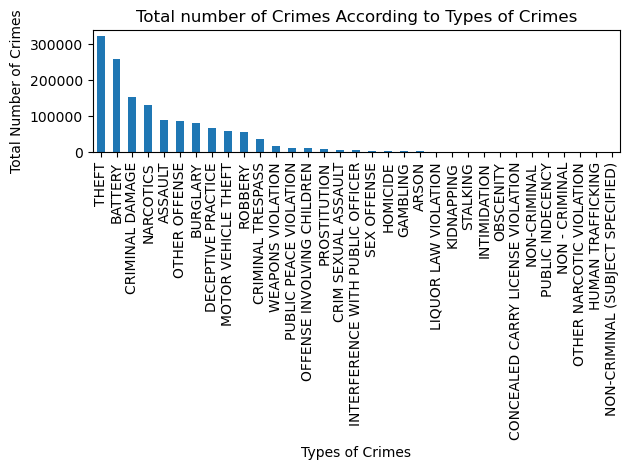

In [14]:
# visualizing and representing the 'Total number of Crimes According to Types of Crimes' in a vertical bar chart
# Plot the value counts of 'Primary Type' to find the most common crime
crimes_dataframe['Primary Type'].value_counts().plot.bar()
plt.title("Total number of Crimes According to Types of Crimes")
plt.ylabel("Total Number of Crimes")
plt.xlabel("Types of Crimes")

# Adjust layout to prevent labels from getting cut off
plt.tight_layout()

# Show plot
plt.show()

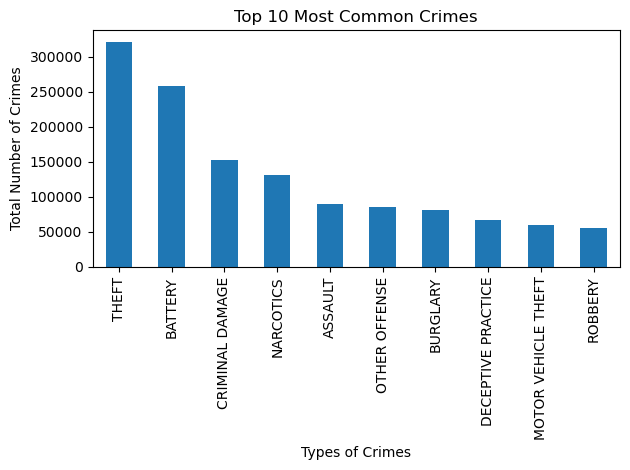

In [15]:
# Calculate the top 10 most common crimes
top_10_crimes = crimes_dataframe['Primary Type'].value_counts().head(10)

# Plot the top 10 most common crimes
top_10_crimes.plot.bar()
plt.title("Top 10 Most Common Crimes")
plt.xlabel("Types of Crimes")
plt.ylabel("Total Number of Crimes")

# Adjust layout to prevent labels from getting cut off
plt.tight_layout()

# Show plot
plt.show()


<Figure size 1000x800 with 0 Axes>

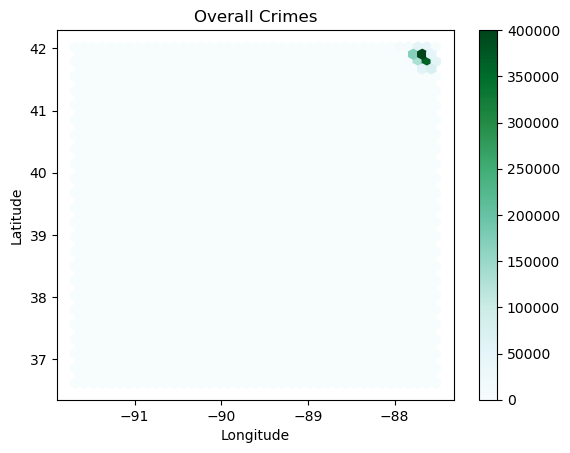

In [16]:
# To see the location of all crimes use a heatmap

# Plot hexbin for overall crimes
plt.figure(figsize=(10, 8))
crimes_dataframe.plot.hexbin(x='Longitude', y='Latitude', gridsize=40)
plt.title("Overall Crimes")
plt.show()

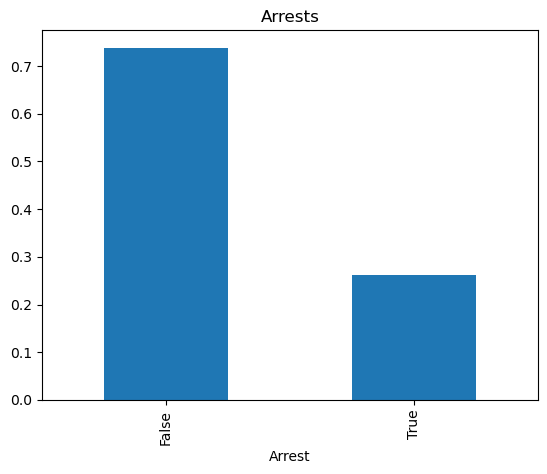

In [17]:
# Calculate the arrest success rate
arrest_success_rate = crimes_dataframe['Arrest'].value_counts(normalize=True)

# Plot the arrest success rate
arrest_success_rate.plot.bar()
plt.title("Arrests")
plt.show()


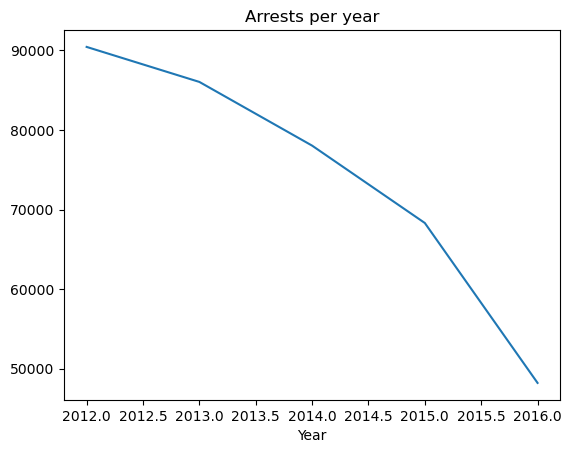

In [18]:
# Filter the DataFrame for arrests and plot the number of arrests per year
arrests_per_year = crimes_dataframe[crimes_dataframe['Arrest'] == True]['Year'].value_counts().sort_index()

# Plot the arrests per year
arrests_per_year.plot.line()
plt.title("Arrests per year")
plt.show()


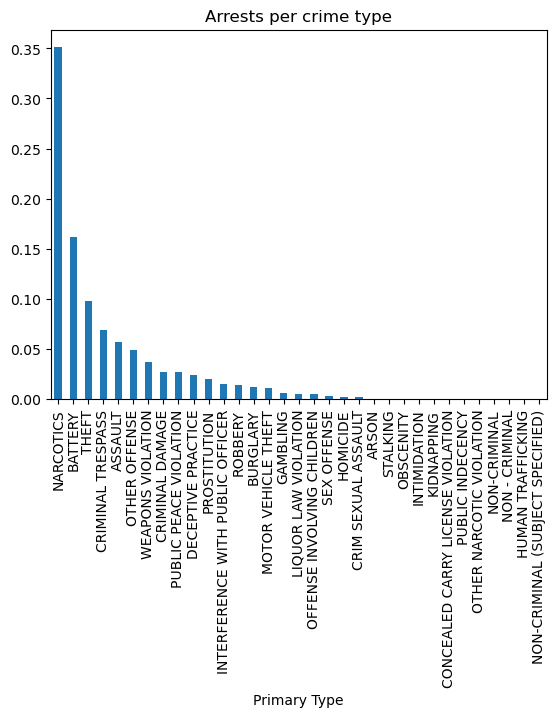

In [19]:
# Calculate the arrest rate for all types of crimes
arrest_rate_per_crime = crimes_dataframe[crimes_dataframe['Arrest'] == True]['Primary Type'].value_counts(normalize=True)

# Plot the arrest rate per crime type
arrest_rate_per_crime.plot.bar()
plt.title("Arrests per crime type")
plt.show()

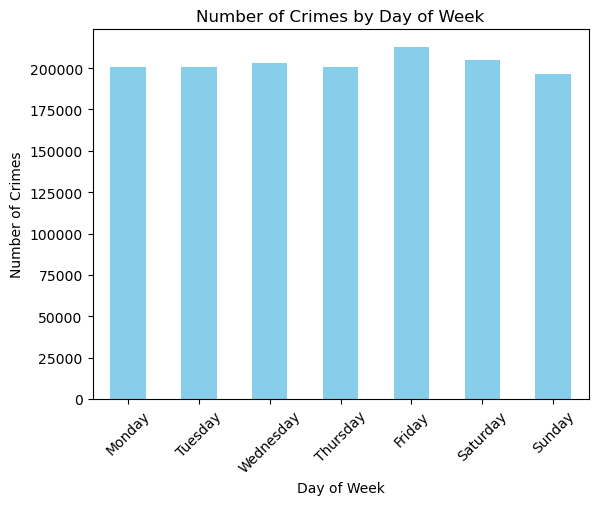

In [20]:
# Convert 'Date' column to datetime
crimes_dataframe['Date'] = pd.to_datetime(crimes_dataframe['Date'], format='%m/%d/%Y %I:%M:%S %p')

# Extract day of the week
crimes_dataframe['Day_of_Week'] = crimes_dataframe['Date'].dt.dayofweek

# Define day names
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Count number of crimes by day of the week
crimes_by_day = crimes_dataframe['Day_of_Week'].value_counts().sort_index()

# Plot the number of crimes by day of the week
crimes_by_day.plot(kind='bar', color='skyblue')
plt.title('Number of Crimes by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Crimes')
plt.xticks(crimes_by_day.index, [days[i] for i in crimes_by_day.index], rotation=45)
plt.show()

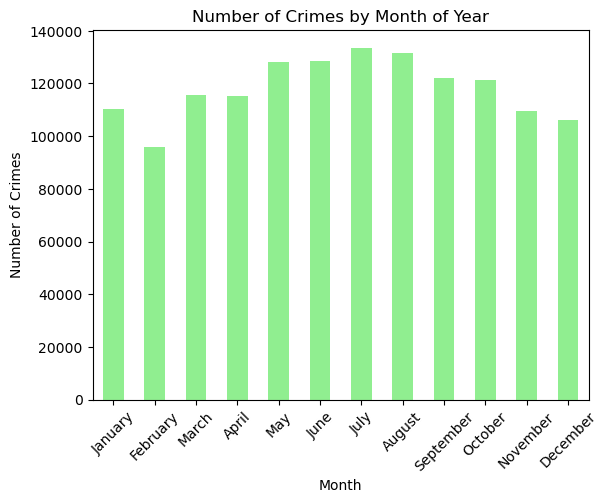

In [21]:
# Convert 'Date' column to datetime
crimes_dataframe['Date'] = pd.to_datetime(crimes_dataframe['Date'], format='%m/%d/%Y %I:%M:%S %p')

# Extract month of the year
crimes_dataframe['Month_of_Year'] = crimes_dataframe['Date'].dt.month

# Define month names
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Count number of crimes by month of the year
crimes_by_month = crimes_dataframe['Month_of_Year'].value_counts().sort_index()

# Plot the number of crimes by month of the year
crimes_by_month.plot(kind='bar', color='lightgreen')
plt.title('Number of Crimes by Month of Year')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.xticks(range(0, 12), [months[i-1] for i in range(1, 13)], rotation=45)
plt.show()

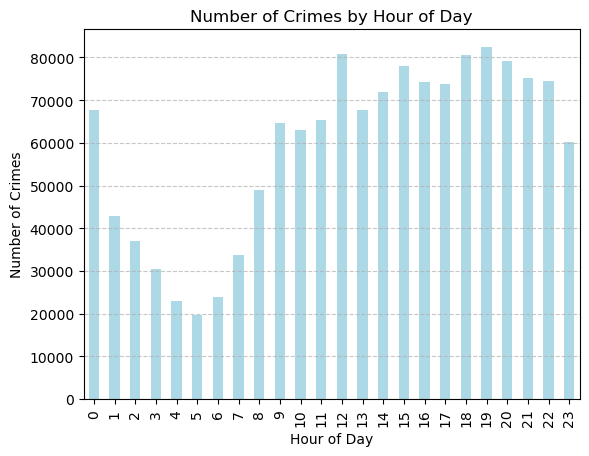

In [22]:
# Convert 'Date' column to datetime
crimes_dataframe['Date'] = pd.to_datetime(crimes_dataframe['Date'], format='%m/%d/%Y %I:%M:%S %p')

# Extract hour of the day
crimes_dataframe['Hour_of_Day'] = crimes_dataframe['Date'].dt.hour

# Count number of crimes by hour of the day
crimes_by_hour = crimes_dataframe['Hour_of_Day'].value_counts().sort_index()

# Plot the number of crimes by hour of the day
crimes_by_hour.plot(kind='bar', color='lightblue')
plt.title('Number of Crimes by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Crimes')
plt.xticks(range(24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()